# Stochastic Gradient Descent

pros:
- Efficiency

cons:
- requires a number of hyperparameters such as the regularization parameter and the number of iterations
- sensitive to feature scaling

In [2]:
import shared.prepare as sp
import shared.classifier as sc
from sklearn.linear_model import SGDClassifier

module = "002_minst"
X_train = sp.loadNp(module, "X_train")
y_train = sp.loadNp(module, "y_train")
y_train_5 = (y_train == '5')

module = "002_minst-sgd"

In [5]:
def fitSGDClassfier(loss, max_iter=1000, n_iter_no_change=5):
    sgd = SGDClassifier(
        loss=loss, learning_rate="optimal", 
        max_iter=max_iter, n_iter_no_change=n_iter_no_change, 
        shuffle=True, random_state=42, n_jobs=-1)
    sgd.fit(X_train, y_train_5)
    print(f'n_iter: {sgd.n_iter_}')
    return sgd

def fitSGDClassfier_std(loss, max_iter=1000, n_iter_no_change=5):
    sgd = sp.make_standard(SGDClassifier(
        loss=loss, learning_rate="optimal", 
        max_iter=max_iter, n_iter_no_change=n_iter_no_change, 
        shuffle=True, random_state=42, n_jobs=-1))
    sgd.fit(X_train, y_train_5)
    print(f'n_iter: {sgd[1].n_iter_}')
    return sgd

## hinde

In [7]:
hinge_clf = sp.loadModel(module, "hinge_clf", lambda: fitSGDClassfier(loss='hinge'))

n_iter: 239


In [8]:
hinge_pred = sp.loadCross_pred(module, "hinge_pred", hinge_clf, X_train, y_train_5)
sc.precisionRecall_check(hinge_clf, y=y_train_5, y_pred=hinge_pred)

[[53115  1464]
 [  916  4505]]

precision: 0.7547327860613168
recall:    0.8310274857037447
f1:        0.791044776119403


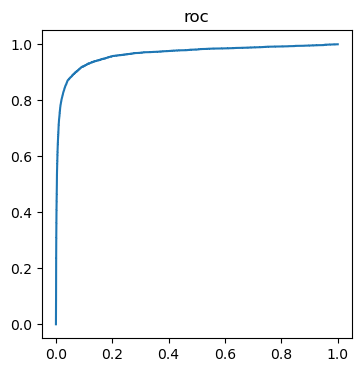

Area under: 0.9648211175804801


In [9]:
hinge_scores = sp.loadCross_decisionFunction(module, "hinge_scores", hinge_clf, X_train, y_train_5)
sc.recallFallout_curve(hinge_clf, X_train, y_train_5, hinge_scores)

### hingeStd

n_iter: 746
[[53975   604]
 [ 1218  4203]]

precision: 0.8743499063865197
recall:    0.7753182069728832
f1:        0.821861556511537


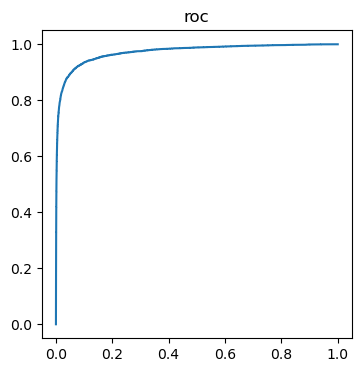

Area under: 0.9725747986146978


In [6]:
sc.check_binary(module, "hingeStd", lambda: fitSGDClassfier_std(loss='hinge'), X=X_train, y=y_train_5)

### hinge hyperparameters

[[53317  1262]
 [ 1348  4073]]

precision: 0.7634489222118088
recall:    0.7513373916251614
f1:        0.7573447378207514


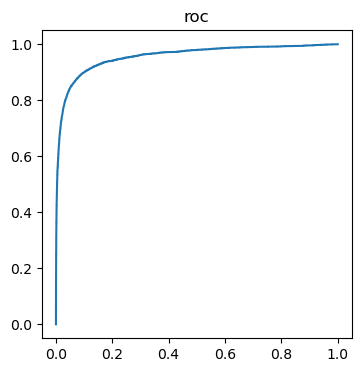

Area under: 0.9571446623107334


In [11]:
sc.check_binary(
  module, "hinge2", 
  lambda: fitSGDClassfier(loss='hinge', n_iter_no_change=10), 
  X=X_train, y=y_train_5)

Consider using `GridSearchCV` to find better `alpha` parameter, see [tips-on-practical-use](https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use)

## log_less

n_iter: 262
[[52960  1619]
 [ 1047  4374]]

precision: 0.7298514934089771
recall:    0.8068622025456558
f1:        0.7664271946732083


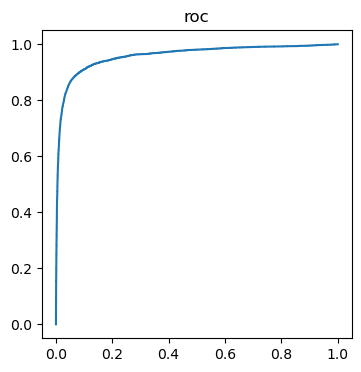

Area under: 0.9595253917918141


In [12]:
sc.check_binary(
  module, "log", 
  lambda: fitSGDClassfier(loss='log_loss'), 
  X=X_train, y=y_train_5)

[[53969   610]
 [ 1223  4198]]

precision: 0.8731281198003328
recall:    0.7743958679210478
f1:        0.8208035976146251


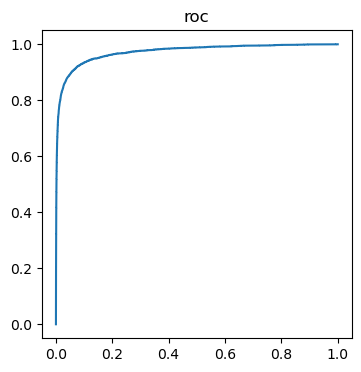

Area under: 0.9727510635745956


In [16]:
sc.check_binary(
  module, "logStd", 
  lambda: fitSGDClassfier_std(loss='log_loss'), 
  X=X_train, y=y_train_5)

## huber

n_iter: 199
[[53490  1089]
 [ 1328  4093]]

precision: 0.7898494789656503
recall:    0.7550267478325032
f1:        0.7720456474582665


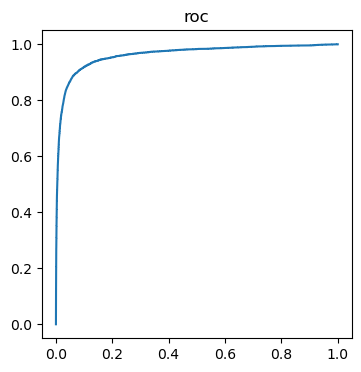

Area under: 0.9630844588838946


In [13]:
sc.check_binary(
  module, "huber", 
  lambda: fitSGDClassfier(loss='modified_huber'), 
  X=X_train, y=y_train_5)

n_iter: 2000


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

[[53952   627]
 [ 1194  4227]]

precision: 0.8708281829419036
recall:    0.7797454344216934
f1:        0.8227737226277372


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

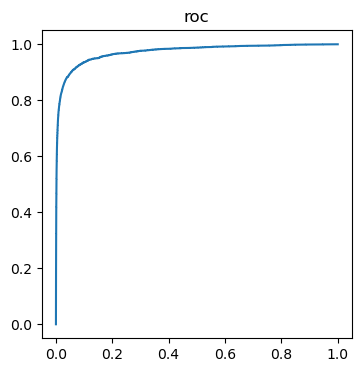

Area under: 0.9728034374398082


In [17]:
sc.check_binary(
  module, "huberStd", 
  lambda: fitSGDClassfier_std(loss='modified_huber', max_iter=2000),  
  X=X_train, y=y_train_5)